In [239]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [240]:
df=pd.read_csv('/content/drive/MyDrive/SVM_Data.csv')

In [241]:
df.head()

,Med_1_mL,Med_2_mL,Virus Present
0,6.508231,8.582531,0
1,4.126116,3.073459,1
2,6.427870,6.369758,0
3,3.672953,4.905215,1
4,1.580321,2.440562,1


In [242]:
df.describe()

,Med_1_mL,Med_2_mL,Virus Present
count,400.000000,400.000000,400.000000
mean,5.447984,5.616750,0.500000
std,2.319059,2.336637,0.500626
min,1.000000,1.000000,0.000000
25%,3.249062,3.431311,0.000000
50%,5.393776,5.638471,0.500000
75%,7.630389,7.782614,1.000000
max,10.000000,10.000000,1.000000


In [243]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Med_1_mL       400 non-null    float64
 1   Med_2_mL       400 non-null    float64
 2   Virus Present  400 non-null    int64  
dtypes: float64(2), int64(1)
memory usage: 9.5 KB


In [244]:
df.isnull().sum()

,0
Med_1_mL,0
Med_2_mL,0
Virus Present,0


In [245]:
df.duplicated().sum()

np.int64(0)

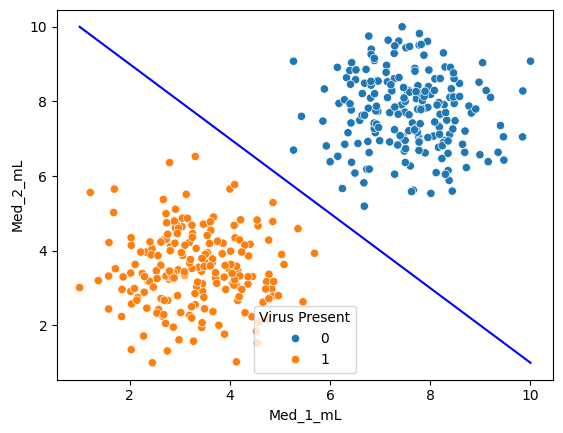

In [246]:
sns.scatterplot(x='Med_1_mL',y='Med_2_mL',data=df, hue='Virus Present')
a=-1
b=11
x=np.linspace(1,10,100)
y=a*x+b

plt.plot(x,y,color='blue')

In [247]:
x=df.drop('Virus Present',axis=1)
y=df['Virus Present']

In [248]:
x_train,x_test,y_train,y_test=train_test_split(x,y,train_size=0.8,random_state=42)

In [249]:
print(y_train.shape)

(320,)


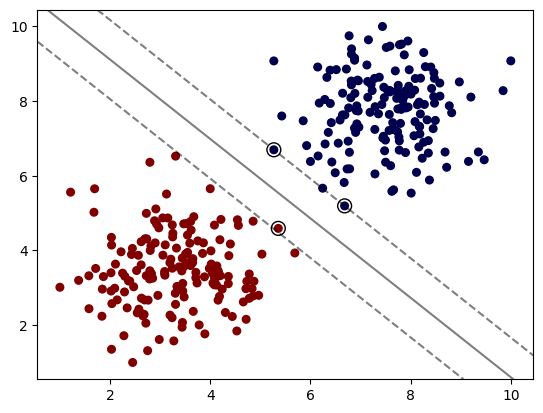

In [250]:
import sys
sys.path.append(r'/content/drive/MyDrive/')
from svm_margin_plot import plot_svm_boundary
plot_svm_boundary(sv,x_train,y_train)

In [251]:
sv=SVC(kernel='linear')
sv.fit(x_train,y_train)


SVC(kernel='linear')

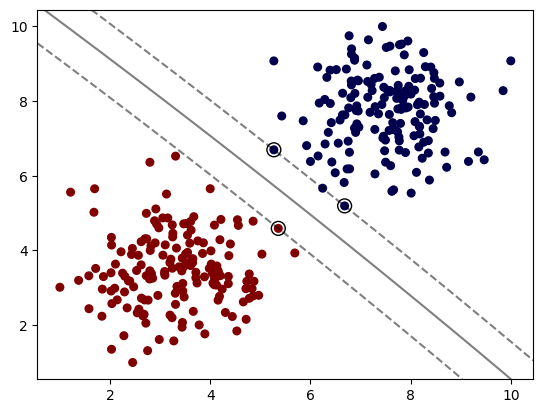

In [252]:
from sklearn.svm import SVC
poly=SVC(kernel='poly',degree=2)
poly.fit(x_train,y_train)
plot_svm_boundary(poly,x_train,y_train)

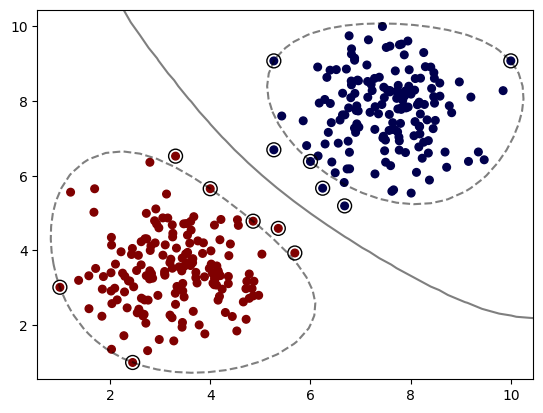

In [253]:
rbf=SVC(kernel='rbf')
rbf.fit(x_train,y_train)
plot_svm_boundary(rbf,x_train,y_train)

In [254]:
from sklearn.svm import SVC

#without paramaters
model=SVC()

#define parameters
params={
    'kernel': ['linear','poly','rbf'],
    'C'     : [1, 0.1, 10]
}

from sklearn.model_selection import GridSearchCV

grid=GridSearchCV(model,params)

# grid.best_estimator_

In [255]:
sv=SVC(kernel='linear')
sv.fit(x_train,y_train)

grid.fit(x_train,y_train)

GridSearchCV(estimator=SVC(),
             param_grid={'C': [1, 0.1, 10],
                         'kernel': ['linear', 'poly', 'rbf']})

In [256]:
y_pred = grid.best_estimator_.predict(x_test)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        42
           1       1.00      1.00      1.00        38

    accuracy                           1.00        80
   macro avg       1.00      1.00      1.00        80
weighted avg       1.00      1.00      1.00        80



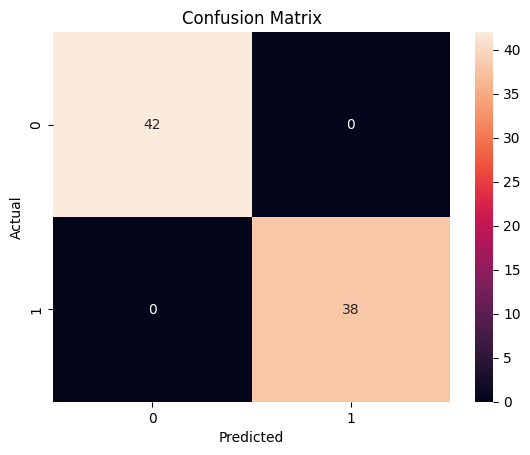

1.0


In [257]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
cr=classification_report(y_test,y_pred)
print(cr)
sns.heatmap(confusion_matrix(y_test,y_pred), annot=True)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()
acc=accuracy_score(y_test,y_pred)
print(acc)